# Real or Fake Tweets Examiner

### Import Libraries

* Lets Import Libraries



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [111]:
# Import Keras

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam 

In [112]:
fake=pd.read_csv('data/Fake_New.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year‚...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama‚Äôs Na...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [113]:
real = pd.read_csv('data/True_New.csv') # Creating a DataFrame 
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


### Lets view some Figures:

([<matplotlib.patches.Wedge at 0x7fd823a217c0>,
 [Text(0.3834292880919157, 1.0310101750386982, 'Real News'),
  Text(-0.3834292880919156, -1.0310101750386982, 'Fake News')])

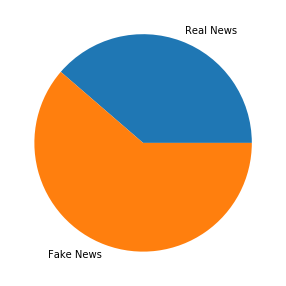

In [114]:
plt.figure(figsize=(5,5)) 
plt.pie([real.shape[0], fake.shape[0]],labels=['Real News', 'Fake News'], shadow=False, colors = None)#pie chart

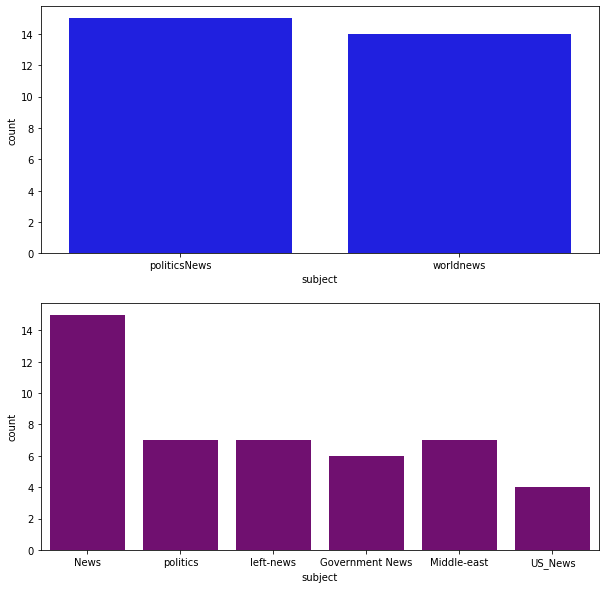

In [115]:
fig,a =  plt.subplots(2,1, figsize=(10,10)) 
sns.countplot(x='subject', data=real, ax=a[0], color = 'blue')


sns.countplot(x='subject', data=fake, ax=a[1], color = 'purple')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWar

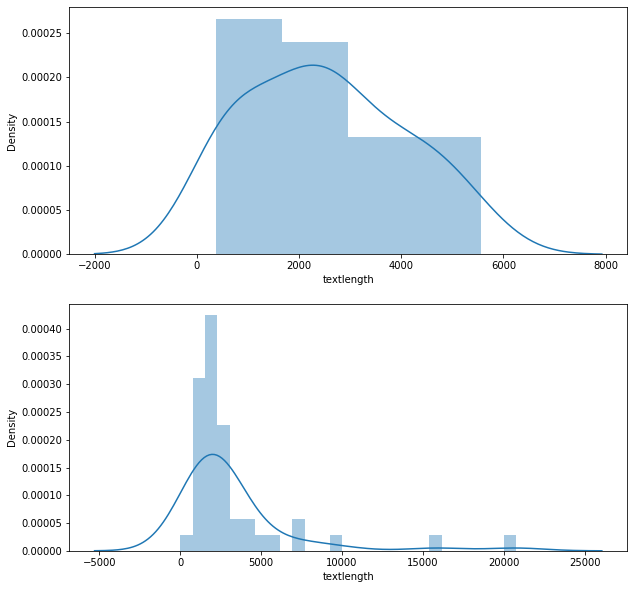

In [116]:
real['textlength']=real['text'].str.len()
fake['textlength']=fake['text'].str.len()


fig,a =  plt.subplots(2,1, figsize=(10,10)) 
sns.distplot(real['textlength'], ax=a[0])
sns.distplot(fake['textlength'], ax=a[1])

#real['textlength']

### Lets use WordCloud 

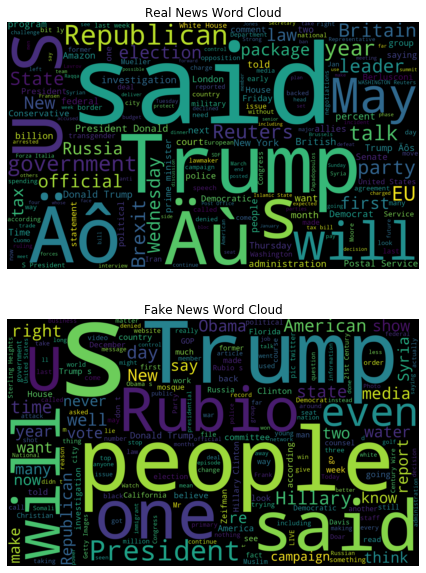

In [117]:

alltextreal=' '.join(set([wd for wd in real['text']]))

alltextfake=' '.join(set([wd for wd in fake['text']]))


wc1 = WordCloud(background_color="black", max_words=200, width=2000, height=1200).generate(alltextreal)

wc2 = WordCloud(background_color="black", max_words=200, width=2000, height=1200).generate(alltextfake)


fig,a =  plt.subplots(2,1,figsize=(20,10))
a[0].imshow(wc1, interpolation='bilinear')
a[0].axis("off")
a[0].set_title('Real News Word Cloud')

a[1].imshow(wc2, interpolation='bilinear')
a[1].axis("off")
a[1].set_title('Fake News Word Cloud')
plt.show()

In [118]:
prcessed = WordCloud().process_text(alltextreal)

### Find Frequency of Words used in Tweets

In [119]:
sortedfreqreal={k: v for k, v in sorted(prcessed.items(), key=lambda item: -item[1])}
sortedfreqreal

{'said': 138,
 'Trump': 67,
 'Äô': 61,
 'Äù': 55,
 's': 51,
 'U S': 49,
 'will': 45,
 'May': 39,
 'Republican': 34,
 'government': 32,
 'year': 32,
 'talk': 29,
 'EU': 28,
 'Reuters': 26,
 'party': 26,
 'Brexit': 25,
 'leader': 24,
 'Britain': 24,
 'State': 23,
 'official': 22,
 'Wednesday': 22,
 'election': 21,
 'New': 21,
 'Russia': 20,
 'law': 20,
 'tax': 19,
 'first': 19,
 'package': 19,
 'investigation': 18,
 'British': 18,
 'want': 18,
 'President Donald': 18,
 'Donald Trump': 18,
 'people': 17,
 'told': 17,
 'percent': 17,
 'New York': 17,
 'court': 16,
 'month': 16,
 'administration': 16,
 'program': 16,
 'Time': 16,
 'Democrat': 16,
 'Trump Äôs': 16,
 'federal': 15,
 'next': 15,
 'billion': 15,
 'Amazon': 15,
 'two': 15,
 'allies': 14,
 'Senate': 14,
 'London': 14,
 'Thursday': 14,
 'prime minister': 14,
 'Postal Service': 14,
 'group': 13,
 'President': 13,
 'Democratic': 13,
 'political': 13,
 'one': 13,
 'police': 13,
 'House': 13,
 'comment': 13,
 'Friday': 13,
 'statement

In [120]:
prcessed2=WordCloud().process_text(alltextfake)

sortedfreqfake={k: v for k, v in sorted(prcessed2.items(), key=lambda item: -item[1])}

sortedfreqfake

{'s': 253,
 'people': 79,
 'Trump': 76,
 'said': 73,
 'one': 71,
 'will': 63,
 'Rubio': 61,
 'U': 61,
 'even': 49,
 'President': 47,
 'Hillary': 44,
 'day': 42,
 'time': 41,
 'American': 40,
 'state': 38,
 'well': 38,
 'right': 37,
 'New': 37,
 'media': 35,
 'Obama': 34,
 'year': 32,
 'show': 32,
 'two': 32,
 'water': 32,
 'say': 31,
 'Republican': 31,
 're': 30,
 'report': 30,
 'many': 29,
 'want': 29,
 'know': 29,
 'now': 29,
 'vote': 29,
 'Syria': 29,
 'make': 28,
 'think': 28,
 'never': 27,
 'campaign': 27,
 'Donald Trump': 27,
 'America': 26,
 'according': 25,
 'House': 25,
 'told': 25,
 'committee': 25,
 'back': 24,
 'look': 24,
 'going': 24,
 'Clinton': 24,
 'believe': 24,
 'Zeifman': 24,
 'week': 23,
 'country': 23,
 'investigation': 23,
 'made': 22,
 'see': 22,
 'Trump s': 22,
 'Hillary Clinton': 22,
 'Russia': 21,
 'December': 21,
 'man': 21,
 'GOP': 21,
 'way': 21,
 'much': 21,
 'Florida': 21,
 'mosque': 21,
 'work': 20,
 'read': 20,
 'Democratic': 19,
 'California': 19,
 's

## Creating Bar Charts for Frequency of Words

<BarContainer object of 50 artists>

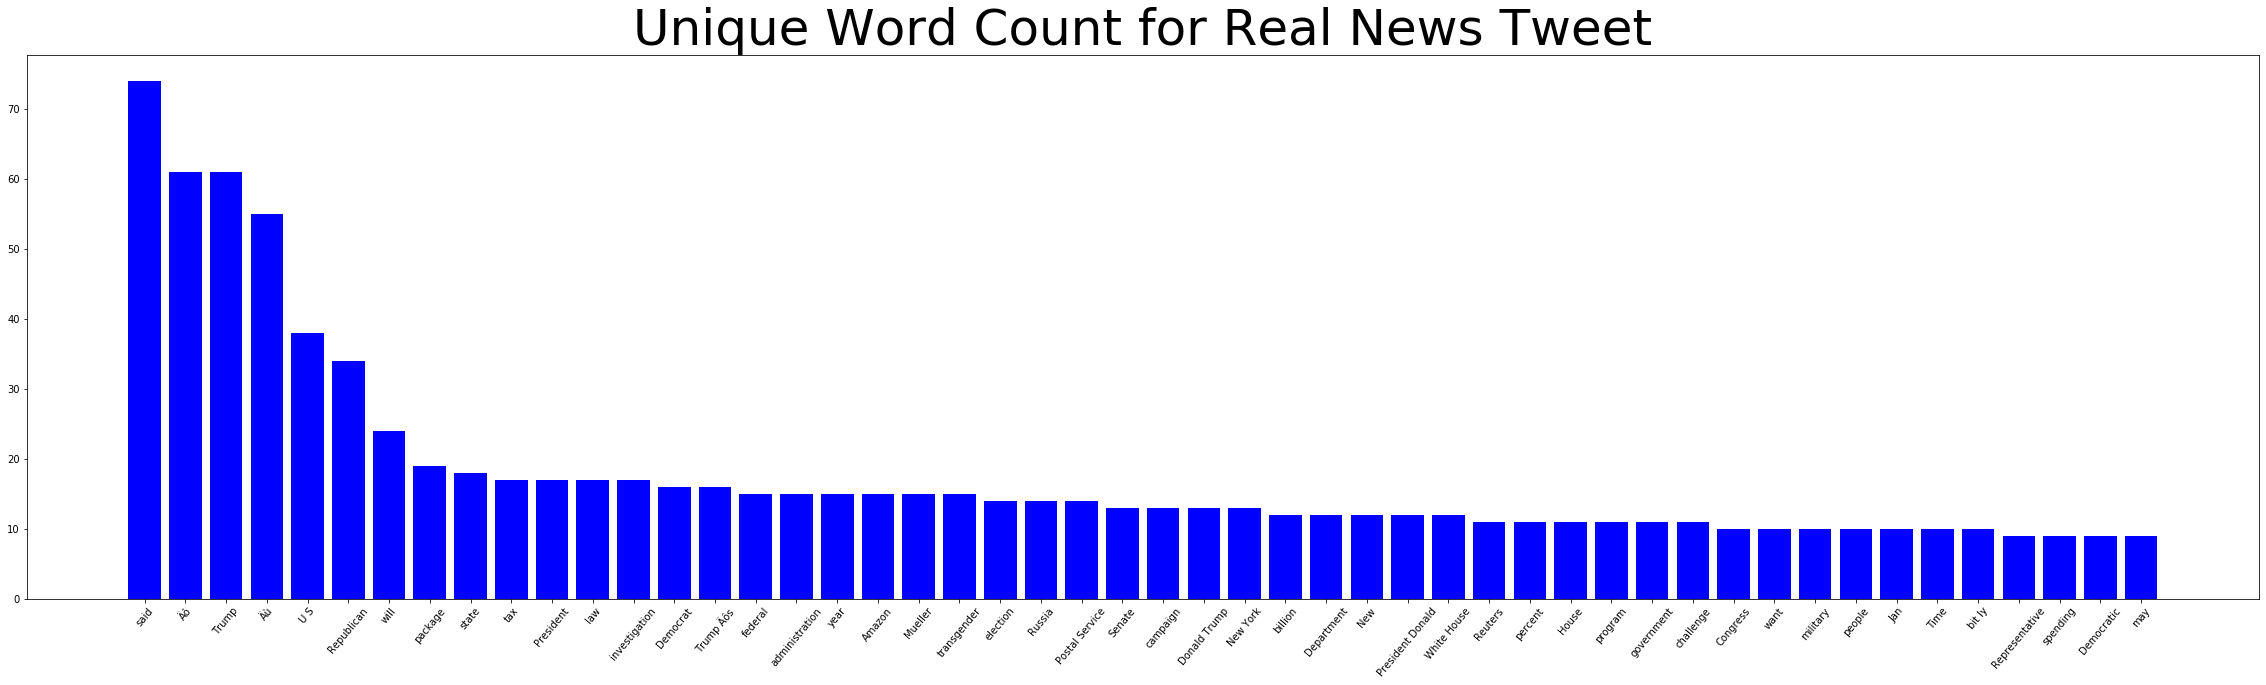

In [74]:
plt.figure(figsize=(40,10))

plt.xticks(rotation=50)

plt.title("Unique Word Count for Real News Tweet", size = 50)
plt.bar(list(sortedfreqreal.keys())[:50],list(sortedfreqreal.values())[:50], color='blue')

Text(0.5, 1.0, 'Unique Word Count for Fake News Tweets')

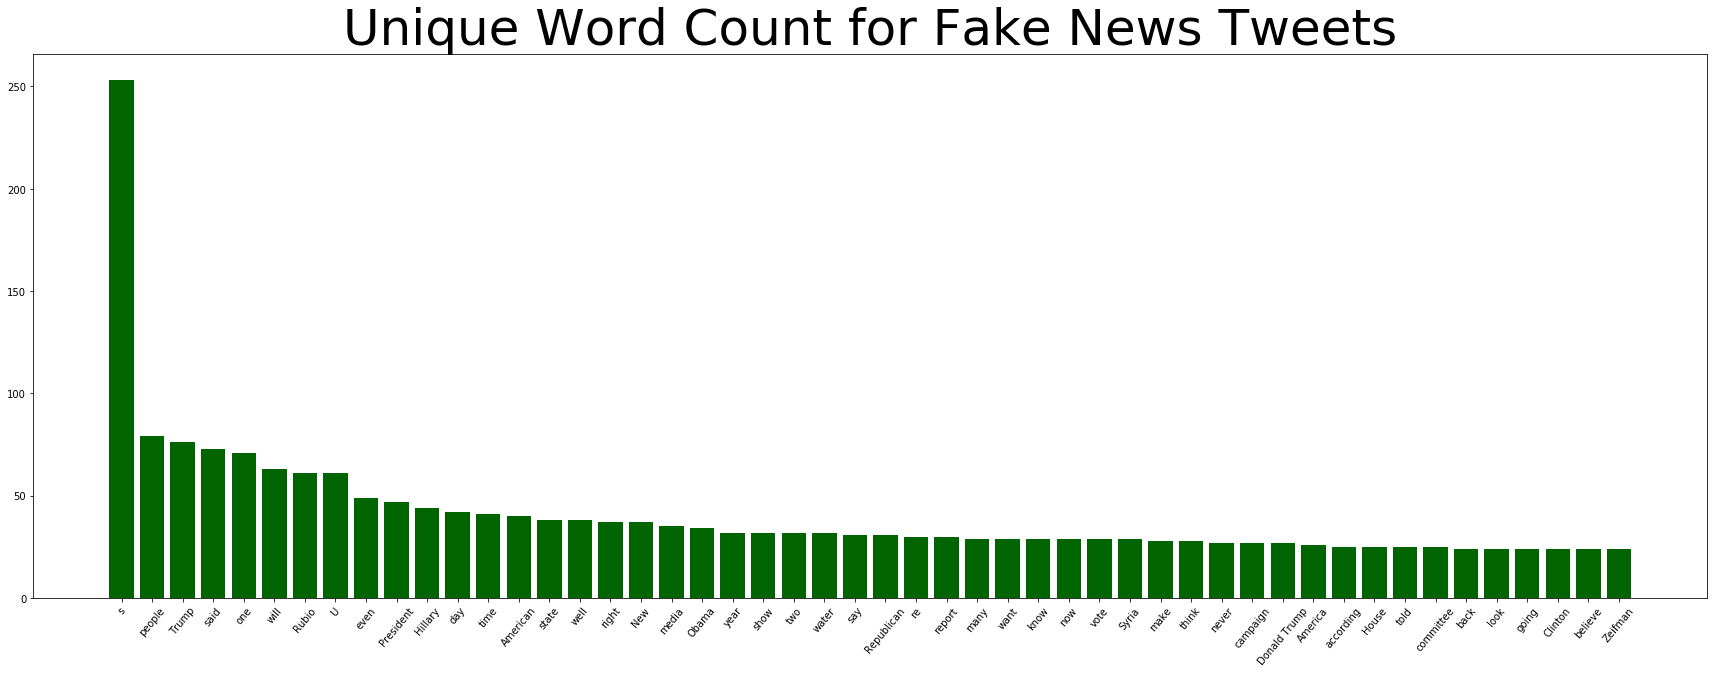

In [75]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=50)
plt.bar(list(sortedfreqfake.keys())[:50],list(sortedfreqfake.values())[:50], color='darkgreen')
plt.title("Unique Word Count for Fake News Tweets", size = 50)

# Preprocessing

data cleaning

- remove tagging people (@kdhefjw)
- remove url
- remove things that are not exactly url but contain slash (pic.twitter.com/wiQSQNNzw0)
- remove (Rueters) which would indicate real news
- remove punctuations
- remove digits
- remove stop words
- stem words

## Using a PorterStemmer

* The Porter stemming algorithm (or ‘Porter stemmer’) is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.



In [31]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
words = ['Connects','Connecting','Connections','Connected','Connection','Connectings','Connect']
for word in words:
    print(word,"--->",porter.stem(word))

Connects ---> connect
Connecting ---> connect
Connections ---> connect
Connected ---> connect
Connection ---> connect
Connectings ---> connect
Connect ---> connect


### Clean() Function that we can run our tweets through

In [121]:
# remove punctuation, stopwords

stemmer = PorterStemmer()

def clean(text):
    if "(Reuters)" in text: # real news contains this identifier sometimes
        
        text = text.split("(Reuters)")[1]
        
    text=re.sub(r'@[^s]*', '', text)
    text=re.sub(r'https?://\S+|www\.\S+', '', text)
    text=" ".join([wd for wd in text.split() if "\\" not in wd and "/" not in wd and wd not in stopwords.words('english')])
    text="".join([c for c in text if c not in string.punctuation])
    text="".join([c for c in text if not c.isdigit()])
    text=re.sub('[^a-zA-z\s]', '', text)
    text=text.lower()
    
    text=" ".join([stemmer.stem(wd) for wd in text.split()])
    return text


# Example of using clean function
print(clean(real["text"][10]))
# real["text"][10]

alabama offici thursday certifi democrat doug jone winner state us senat race state judg deni challeng republican roy moor whose campaign derail accus sexual misconduct teenag girl jone vacant seat vote percentag point elect offici said that made first democrat quarter centuri win senat seat alabama the seat previous held republican jeff session tap us presid donald trump attorney gener a state canvass board compos alabama secretari state john merril governor kay ivey attorney gener steve marshal certifi elect result seat jone narrow republican major senat seat in statement jone call victori a new chapter pledg work parti moor declin conced defeat even trump urg so he stood claim fraudul elect statement releas certif said regret media outlet report an alabama judg deni moor request block certif result dec elect decis shortli canvass board met moor challeng alleg potenti voter fraud deni chanc victori hi file wednesday montgomeri circuit court sought halt meet schedul ratifi jone win th

## Cleaning Data

* Lets clean he datasets

In [81]:
# Add 
real["isfake"]=0
fake["isfake"]=1

allnews = pd.concat([real, fake]) ## Combine the two datasets (real and Fake)

# Cleans dataset Line by Line using Lambda function for every line (text) : perform clean functionon the tweet
allnews['text'] = allnews['text'].apply(lambda text: clean(text))

pd.DataFrame.to_csv(allnews, "cleaned_news_text_new.csv", index=False)

In [82]:
cleanedtext=pd.read_csv("cleaned_news_text_new.csv")

In [85]:
cleanedtext.head()

,title,text,subject,date,textlength,isfake
0,"As U.S. budget fight looms, Republicans flip t...",the head conserv republican faction us congres...,politicsNews,31-Dec-17,4727,0
1,U.S. military to accept transgender recruits o...,transgend peopl allow first time enlist us mil...,politicsNews,29-Dec-17,4125,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,the special counsel investig link russia presi...,politicsNews,31-Dec-17,2825,0
3,FBI Russia probe helped by Australian diplomat...,trump campaign advis georg papadopoulo told au...,politicsNews,30-Dec-17,2485,0
4,Trump wants Postal Service to charge 'much mor...,presid donald trump call us postal servic frid...,politicsNews,29-Dec-17,5240,0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(cleanedtext.dropna()['text'],cleanedtext.dropna()['isfake'],test_size=0.1, random_state=10)#set random state

In [87]:
X_train.shape

(66,)

In [88]:
X_test.shape

(8,)

In [89]:
vtz=TfidfVectorizer()
X_train=vtz.fit_transform(X_train)
X_test=vtz.transform(X_test)

In [90]:
# print(vtz.get_feature_names()[:10])
# print(vec.toarray()[:10])
print(len(vtz.get_feature_names()))
print(X_train.shape)
print(X_test.shape)
print(cleanedtext.dropna().shape)


4410
(66, 4410)
(8, 4410)
(74, 6)


### Models
Logistic regression

0.375
[[0 5]
 [0 3]]


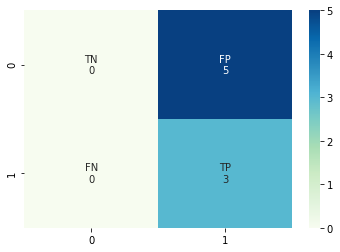

In [91]:
lr = LogisticRegression()
lr.fit(X_train, y_train) 
print(lr.score(X_test, y_test))
lr_pred=lr.predict(X_test)
lrcm=confusion_matrix(y_test,lr_pred)
print(lrcm)

# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in lrcm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lrcm, annot=labels, fmt='', cmap="GnBu")


### naive bayes

0.5
[[1 4]
 [0 3]]


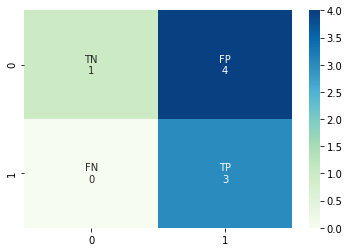

In [92]:

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred=nb.predict(X_test)
print(nb.score(X_test, y_test))
nb_cm=confusion_matrix(y_test,nb_pred)
print(nb_cm)

# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in nb_cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nb_cm, annot=labels, fmt='', cmap="GnBu")

## SVM


0.75
[[3 2]
 [0 3]]


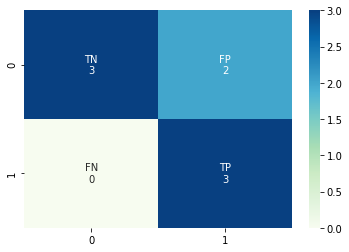

In [93]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier()
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
print(svm.score(X_test, y_test))
svm_cm=confusion_matrix(y_test,svm_pred)
print(svm_cm)

# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in svm_cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_cm, annot=labels, fmt='', cmap="GnBu")

### LSTM (Long Short-Term Memory)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(cleanedtext.dropna()['text'],cleanedtext.dropna()['isfake'],test_size=0.1, random_state=10)#set random state

In [95]:
tkn = Tokenizer()
tkn.fit_on_texts(X_train.values)
X_train = tkn.texts_to_sequences(X_train.values)
X_train = pad_sequences(X_train)
X_test = tkn.texts_to_sequences(X_test.values)
X_test = pad_sequences(X_test)


In [96]:
print(X_train.shape, y_train.shape)

(66, 2081) (66,)


In [97]:
from keras.layers import Bidirectional
model = Sequential()
# tf.keras.layers.Embedding(
#     input_dim,
#     output_dim,
#     input_length=None,
# )
model.add(Embedding(len(tkn.word_index) + 1, 256, input_length = X_train.shape[1]))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.2)) #drop out to try avoid overfitting with too many hidden units
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation='sigmoid')) # final layer activation is sigmoid becuase classifying 1/0
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2081, 256)         1132800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,543,553
Trainable params: 1,543,553
Non-trainable params: 0
____________________________________________

In [98]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
1/1 [==============================] - 19s 19s/step - loss: 0.6931 - accuracy: 0.5152
Epoch 2/5
1/1 [==============================] - 9s 9s/step - loss: 0.6795 - accuracy: 0.6364
Epoch 3/5
1/1 [==============================] - 9s 9s/step - loss: 0.6673 - accuracy: 0.6364
Epoch 4/5
1/1 [==============================] - 9s 9s/step - loss: 0.6508 - accuracy: 0.6364
Epoch 5/5
1/1 [==============================] - 10s 10s/step - loss: 0.6371 - accuracy: 0.6364


In [99]:
score, acc = model.evaluate(X_test, y_test,batch_size=10)


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 2081), found shape=(None, 571)


In [ ]:

print('accuracy:', acc)

In [ ]:
X=None
X_train=None
y_train=None
cleanedtext=None
pred =model.predict_classes(X_test)
print(pred[:20])

In [ ]:
lstm_cm=confusion_matrix(y_test,pred)
print(lstm_cm)

# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in lstm_cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lstm_cm, annot=labels, fmt='', cmap="GnBu")